In [1]:
def show_data(data_sample, shape = (28,28)):
    plt.imshow(data_sample[0].numpy(),reshape(shape), cmap='gray')
    plt.title('y= ' + data_sample[1])

In [2]:
import torch
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

In [3]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

In [4]:
#The path to the csv with the labels for each image
#CSV파일을 주소로 읽어서 첫번쨰 다섯깨 예시를 출력
directory =""
csv_file='index.csv'
csv_path = os.path.join(directory, csv_file)

In [5]:
data_name = pd.read_csv(csv_path)
data_name.head()

FileNotFoundError: [Errno 2] No such file or directory: 'index.csv'

In [6]:
dir


<function dir>

In [7]:
! ls

'1.1_2 Two-Dimensional Tensors_v2.ipynb'
 1.2derivativesandGraphsinPytorch_v2.ipynb
 1.3.1_simple_data_set_v2.ipynb
 1.3.2_Datasets_and_transforms.ipynb
's5_dataset n transform img.ipynb'


In [8]:
cd ..


/resources/labs


In [9]:
dir


<function dir>

In [10]:
! ls

DL0110EN_coursera


In [11]:
cd ..

/resources


In [12]:
! ls

data  img  index.csv  labs


In [13]:
! ls

data  img  index.csv  labs


In [14]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [19]:
print('File name: ',data_name.iloc[3,1])
# 몇행 몇열의 정보를 가져와라

File name:  img/fashion3.png


In [18]:
print('y: ',data_name.iloc[0,0])

y:  Ankle boot


In [20]:
print('The number of rows: ',data_name.shape[0])

The number of rows:  60000


In [22]:
print('The number of cols: ',data_name.shape[1])

The number of cols:  2


In [23]:
print("shape: ",data_name.shape)

shape:  (60000, 2)


In [24]:
#Load Image
image_name = data_name.iloc[1,1]

In [25]:
image_name

'img/fashion1.png'

In [26]:
image_path = os.path.join(directory, image_name)

In [27]:
image_path

'img/fashion1.png'

In [28]:
! ls

data  img  index.csv  labs


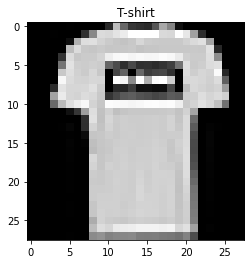

In [29]:
#Plot the second training image
image = Image.open(image_path)
plt.imshow(image, cmap = 'gray',vmin=0,vmax=255)
plt.title(data_name.iloc[1,0])
plt.show()

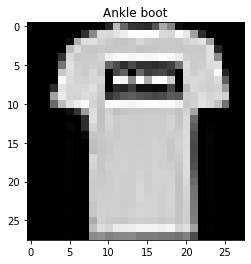

In [30]:
#Plot the first training image
image = Image.open(image_path)
plt.imshow(image, cmap = 'gray',vmin=0,vmax=255)
plt.title(data_name.iloc[0,0])
plt.show()

In [31]:
#Create my own dataset object

class Dataset(Dataset):
    def __init__(self, csv_file, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        data_dircsv_file = os.path.join(self.data_dir, csv_file)
        self.data_name = pd.read_csv(data_dircsv_file)
        self.len = self.data_name.shape[0]
        
    def __len__(self):
        return self.len
    
    def __getitem__(self,idx):
         # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y
    

In [32]:
dataset = Dataset(csv_file= csv_file, data_dir = directory)

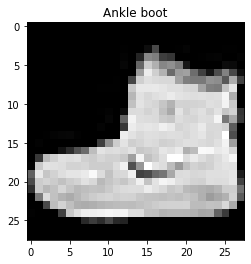

In [33]:
image = dataset[0][0]
y = dataset[0][1]
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

In [34]:
y


'Ankle boot'

In [35]:
dataset[0][1][0]

'A'

In [36]:
dataset[0][2]

IndexError: tuple index out of range

In [37]:
dataset[0][0]

In [38]:
dataset[1]

(<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F275ACD2630>,
 'T-shirt')

In [39]:
dataset[1][0]

In [40]:
import torchvision.transforms as transforms

In [41]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=croptensor_data_transform )
print("The shape of the first element tensor: ", dataset[0][0].shape)

The shape of the first element tensor:  torch.Size([1, 20, 20])


In [42]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

NameError: name 'reshape' is not defined

In [46]:
def show_data(data_sample, shape = (28,28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y= ' + data_sample[1])

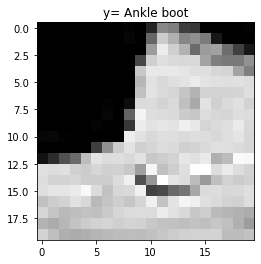

In [47]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

In [48]:
# These are the libraries will be used for this lab.

import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

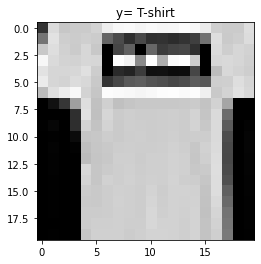

In [49]:
# Plot the second element in the dataset

show_data(dataset[1],shape = (20, 20))

In [50]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )
show_data(dataset[1])

TypeError: object() takes no parameters

In [51]:
fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])

In [52]:
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )

TypeError: object() takes no parameters

In [53]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

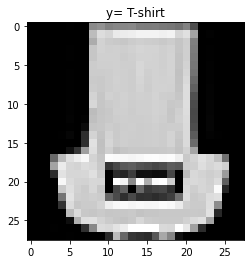

In [54]:
fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )
show_data(dataset[1])

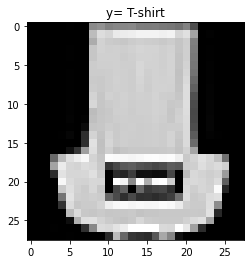

In [56]:
my_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),
                                       transforms.RandomHorizontalFlip(p=1), transforms.ToTensor()])
dataset = Dataset(csv_file = csv_file,
                 data_dir= directory, transform = fliptensor_data_transform)
show_data(dataset[1])